IMPORTING LIBRARIES

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
df = pd.read_csv("/content/drive/MyDrive/Fenny Labs Intern/3/test.csv")

In [210]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,1,68.0,186.0,1.00,0.5,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,1,170.0,161.0,2.55,0.5,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
3,3,1,170.0,233.0,2.00,0.5,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
4,4,1,237.0,236.0,1.00,0.5,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3


CHECKING FOR NULL VALUES

In [211]:
df.isnull().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
dtype: int64

In [212]:
print(df.shape)

(154235, 16)


In [213]:
df = df.dropna()

In [214]:
print(df.shape)

(154235, 16)


In [215]:
df.isnull().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
dtype: int64

MAKING A NEW DATAFRAME X WITH IMPORTANT FEATURES

In [216]:
x = df.iloc[:, [0,1,6,7,8,9,10,11,14,15]]
x.head()

,ID,vendor_id,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,extra_charges,improvement_charge
0,0,1,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,0.5,0.3
1,1,1,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,0.0,0.3
2,2,2,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,0.0,0.3
3,3,1,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,0.0,0.3
4,4,1,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,0.0,0.3


In [217]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  154235 non-null  int64  
 1   vendor_id           154235 non-null  int64  
 2   pickup_loc          154235 non-null  float64
 3   drop_loc            154235 non-null  float64
 4   driver_tip          154235 non-null  float64
 5   mta_tax             154235 non-null  float64
 6   distance            154235 non-null  float64
 7   pickup_time         154235 non-null  object 
 8   drop_time           154235 non-null  object 
 9   num_passengers      154235 non-null  float64
 10  toll_amount         154235 non-null  float64
 11  payment_method      154235 non-null  float64
 12  rate_code           154235 non-null  float64
 13  stored_flag         154235 non-null  object 
 14  extra_charges       154235 non-null  float64
 15  improvement_charge  154235 non-nul

In [218]:
rate_code_counts = df['rate_code'].value_counts()
print(rate_code_counts)

rate_code
1.0     150003
2.0       3264
5.0        473
3.0        396
4.0         97
99.0         1
6.0          1
Name: count, dtype: int64


rate_code - Rate code for the trip (1 = Standard, 2 = Airport, 3 = Connaught Place, 4 = Noida, 5 = Negotiated Fare, 6 = Pooled ride)

Visualizing different trips of customers

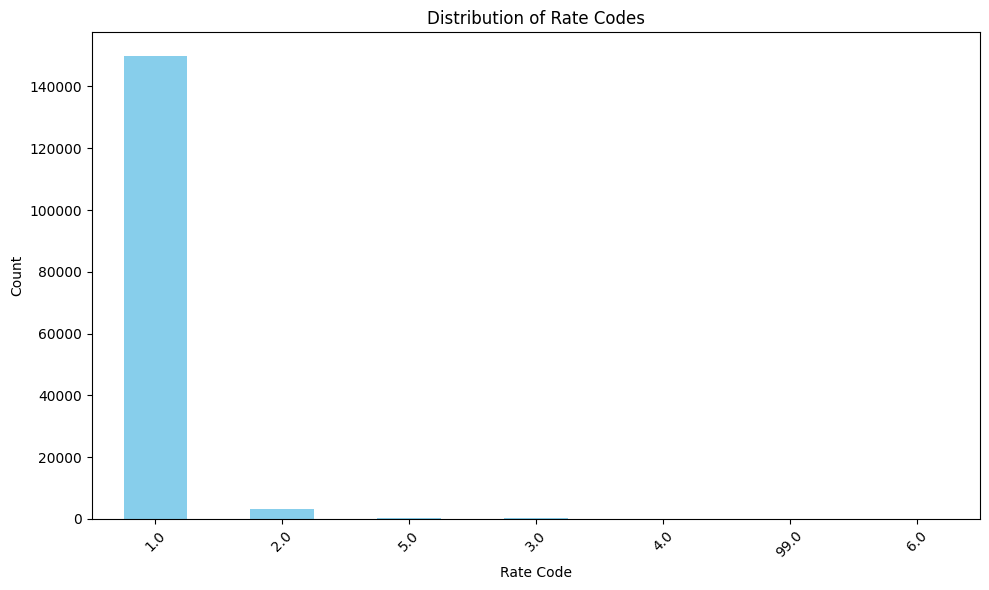

In [219]:
plt.figure(figsize=(10, 6))
rate_code_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Rate Codes')
plt.xlabel('Rate Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Date in format %m/%d/%Y %I:%M:%S %p, has been changed and day,month and year has been separated to apply segmentation in next steps

In [220]:
x['pickup_time'] = pd.to_datetime(x['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
x['drop_time'] = pd.to_datetime(x['drop_time'], format='%m/%d/%Y %I:%M:%S %p')

x['pickup_hour_of_day'] = x['pickup_time'].dt.hour
x['pickup_day_of_week'] = x['pickup_time'].dt.dayofweek
x['pickup_month'] = x['pickup_time'].dt.month

x['drop_hour_of_day'] = x['drop_time'].dt.hour
x['drop_day_of_week'] = x['drop_time'].dt.dayofweek
x['drop_month'] = x['drop_time'].dt.month

x.drop(columns=['pickup_time', 'drop_time'], inplace=True)

<ipython-input-220-0861daa54ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['pickup_time'] = pd.to_datetime(x['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-220-0861daa54ce6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['drop_time'] = pd.to_datetime(x['drop_time'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-220-0861daa54ce6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [221]:
x.head()

,ID,vendor_id,distance,num_passengers,toll_amount,payment_method,extra_charges,improvement_charge,pickup_hour_of_day,pickup_day_of_week,pickup_month,drop_hour_of_day,drop_day_of_week,drop_month
0,0,1,0.70,1.0,0.0,1.0,0.5,0.3,5,2,4,5,2,4
1,1,1,1.00,1.0,0.0,1.0,0.0,0.3,8,4,4,9,4,4
2,2,2,3.35,2.0,0.0,1.0,0.0,0.3,8,3,4,8,3,4
3,3,1,0.80,2.0,0.0,1.0,0.0,0.3,8,1,4,8,1,4
4,4,1,0.70,1.0,0.0,1.0,0.0,0.3,10,4,4,11,4,4


For the dataset, we have extracted relevant time components such as hour of the day, day of the week, and month from pickup and drop times.
Segmenting the data based on the hour of the day / day of the week / month helps to understand the distribution of taxi rides throughout the day.

In [222]:
hourly_segmentation = x.groupby('pickup_hour_of_day').size()

daily_segmentation = x.groupby('pickup_day_of_week').size()

monthly_segmentation = x.groupby('pickup_month').size()

print(hourly_segmentation)

pickup_hour_of_day
0      3729
1      2113
2      1368
3       957
4       857
5      1398
6      4082
7      8535
8     10068
9      9141
10     8160
11     8021
12     8391
13     8250
14     8880
15     8218
16     6279
17     7128
18     9600
19     8997
20     8319
21     8391
22     7684
23     5669
dtype: int64


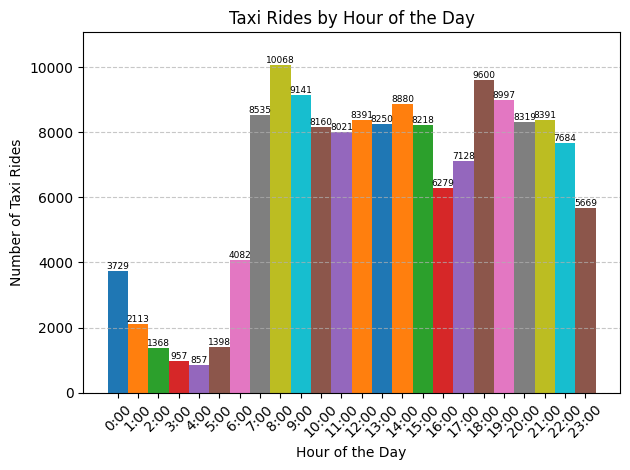

In [223]:
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
          '#7f7f7f', '#bcbd22', '#17becf', '#8c564b', '#9467bd', '#ff7f0e']

plt.bar(hourly_segmentation.index, hourly_segmentation, color=colors, width = 1)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Taxi Rides')
plt.title('Taxi Rides by Hour of the Day')

for i, v in enumerate(hourly_segmentation):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=6.5, color='black')

plt.xticks(range(24), [f"{hour}:00" for hour in range(24)], rotation=45)
plt.ylim(0, max(hourly_segmentation) * 1.1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [224]:
print(daily_segmentation)

pickup_day_of_week
0    27816
1    33551
2    35117
3    36290
4    19960
6     1501
dtype: int64


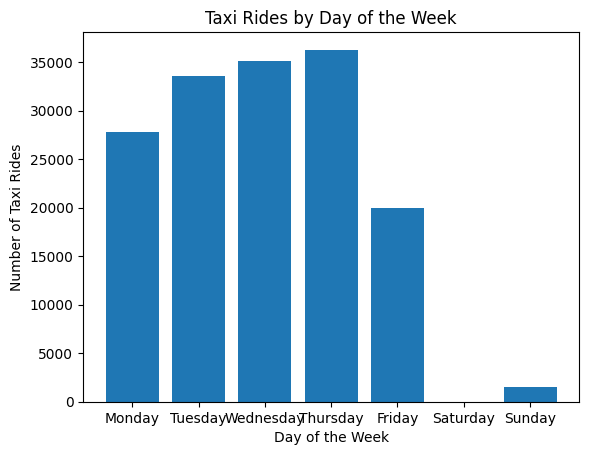

In [225]:
import matplotlib.pyplot as plt

plt.bar(daily_segmentation.index, daily_segmentation)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Taxi Rides')
plt.title('Taxi Rides by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


num_passengers - Cab passenger count

In [226]:
x['num_passengers'].unique()

array([1., 2., 6., 5., 4., 3., 0.])

In [227]:
passenger_counts = x['num_passengers'].value_counts()

# Display the counts
print(passenger_counts)

num_passengers
1.0    114157
2.0     20178
5.0      7296
3.0      5495
6.0      4591
4.0      2514
0.0         4
Name: count, dtype: int64


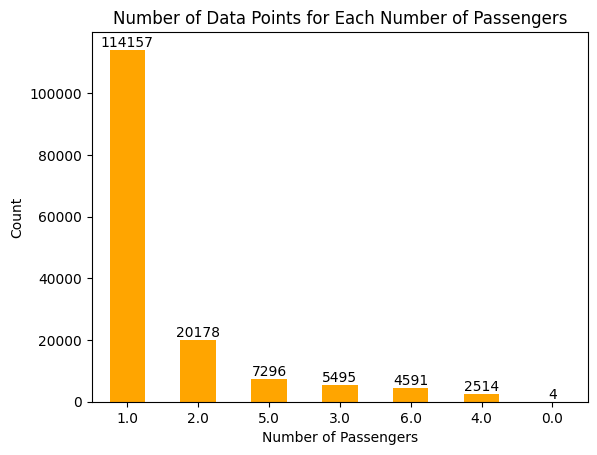

In [228]:
passenger_counts.plot(kind='bar', color='orange')

for i, v in enumerate(passenger_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Number of Data Points for Each Number of Passengers')
plt.xticks(rotation=0)
plt.show()

Visualizing the distribution of Vendors which provide cabs

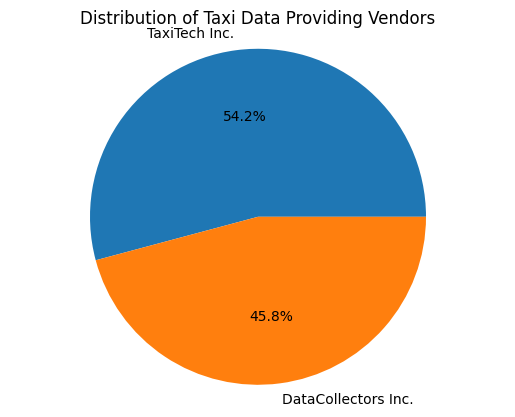

In [229]:
vendor_counts = x['vendor_id'].value_counts()
plt.pie(vendor_counts, labels=['TaxiTech Inc.', 'DataCollectors Inc.'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Taxi Data Providing Vendors')
plt.axis('equal')
plt.show()

Feature Scaling - Now, we have to apply Feature Scaling because some variables like age have very high values as compared to the other varibale, so the model can become bias here.

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
print(x_scaled_df.head())

         ID  vendor_id  distance  num_passengers  toll_amount  payment_method  \
0 -1.732040  -1.087129 -0.583372       -0.469454    -0.220049       -0.654617   
1 -1.732017  -1.087129 -0.503087       -0.469454    -0.220049       -0.654617   
2 -1.731995   0.919854  0.125813        0.327577    -0.220049       -0.654617   
3 -1.731972  -1.087129 -0.556610        0.327577    -0.220049       -0.654617   
4 -1.731950  -1.087129 -0.583372       -0.469454    -0.220049       -0.654617   

   extra_charges  improvement_charge  pickup_hour_of_day  pickup_day_of_week  \
0       0.324127            0.024268           -1.477556            0.033260   
1      -0.700390            0.024268           -0.962271            1.505467   
2      -0.700390            0.024268           -0.962271            0.769364   
3      -0.700390            0.024268           -0.962271           -0.702843   
4      -0.700390            0.024268           -0.618747            1.505467   

   pickup_month  drop_hour_of_da

In [231]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
Using the elbow method to find the optimal number of clusters -- USING WCSS

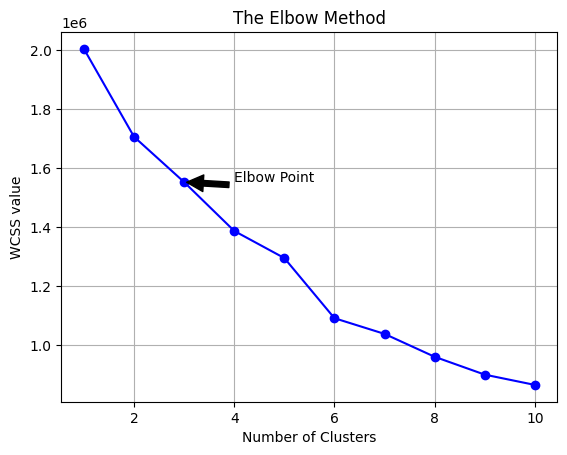

In [232]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS value")

plt.annotate('Elbow Point', xy=(3, wcss[2]), xytext=(4, wcss[2] + 100),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True)
plt.show()

Segmentation of customers

In [233]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmean.fit_predict(x_scaled)
cluster_labels = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [234]:
pd.Series(kmean.labels_).value_counts()

1    59574
0    51729
2    42932
Name: count, dtype: int64

Segmentation customers on basis of num_passengers and pickup_hour_of_day

In [235]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

segmentation_features = x[['num_passengers', 'pickup_hour_of_day']]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_features)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [236]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmean.fit_predict(segmentation_features)
cluster_labels = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [237]:
pd.Series(kmean.labels_).value_counts()

1    55788
2    50408
0    48039
Name: count, dtype: int64